In [173]:
#download the data with scrap from github
import urllib.request
import os
data_path=os.path.join("datasets","lifesat","")
download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(data_path,exist_ok=True)
for file_name in ("oecd_bli_2015.csv","gdp_per_capita.csv"):
    print("Downloading", file_name)
    url=download_root + "datasets/lifesat/"+ file_name
    urllib.request.urlretrieve(url,data_path + file_name)

    

In [174]:
def prepare_country_stats(oecd_bli_2015,gdp_per_capita):
    oecd_bli_2015=oecd_bli_2015[oecd_bli_2015["INEQUALITY"]=="TOT"]
    oecd_bli_2015=oecd_bli_2015.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015":"GDP per capita"},inplace=True)
    gdp_per_capita.set_index("Country",inplace=True)
    full_country_stats=pd.merge(left=oecd_bli_2015,right=gdp_per_capita,
                               left_index=True, right_index=True )#on index->Country, jadi untuk country yang sma
    full_country_stats.sort_values(by="GDP per capita",inplace=True)
    remove_index=[0,1,6,8,33,34,35]
    keep_index=list(set(range(36)) - set(remove_index))
    return full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_index]

In [175]:
# load data
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import numpy as np

# load data gdp_percapita
gdp_per_capita= pd.read_csv(data_path + "gdp_per_capita.csv", thousands=",",encoding="latin1",na_values="n/a",delimiter="\t") 
oecd_per_capita = pd.read_csv(data_path + "oecd_bli_2015.csv",thousands=",")
country_stats=prepare_country_stats(oecd_per_capita,gdp_per_capita)
print(country_stats)

                 GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336                7.4
New Zealand           37044.891                7.3
France                37675.006                6.5
Belgium               40106.632                6.9
Germany               40996.511

In [176]:
# cek data
print(gdp_per_capita.info())
print("\n")
print(oecd_per_capita.info())

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Afghanistan to International Monetary Fund, World Economic Outlook Database, April 2016
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Subject Descriptor             189 non-null    object 
 1   Units                          189 non-null    object 
 2   Scale                          189 non-null    object 
 3   Country/Series-specific Notes  188 non-null    object 
 4   GDP per capita                 187 non-null    float64
 5   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(4)
memory usage: 14.5+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country       

In [177]:
# config to plot the perty figure with jupiter
import matplotlib as mpl
mpl.rc("axes",labelsize=14)
mpl.rc("xtick",labelsize=12)
mpl.rc("ytick",labelsize=12)



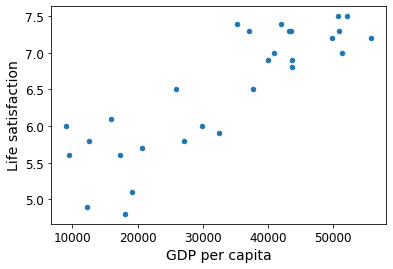

In [178]:
# prepare data
X=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

#visualisasi data
country_stats.plot(kind="scatter",x="GDP per capita",y="Life satisfaction")
plt.show()

In [179]:
# select the model->linear model
model= sklearn.linear_model.LinearRegression()
model.fit(X,y)
# make new data for prediction
X_new=[[22587]] # Rusian GDP per capita
print(model.predict(X_new)) #Cyprus life statification
# -> 6.0, => 0.7 error prediction linear

[[5.96242338]]


In [180]:
# kNeighbors neighbors regresion model
import sklearn.neighbors

# train the model
model1=sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model1.fit(X,y)
print(model1.predict(X_new))

[[5.76666667]]


In [181]:
remove_index=[0,1,6,8,33,34,35]
print(list(set(range(36)) - set(remove_index)))

[2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [182]:
data=oecd_per_capita[oecd_per_capita["INEQUALITY"]=="TOT"]
data=data.pivot(index="Country",columns="Indicator",values="Value")
print(data)



Indicator        Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                     
Australia                 13.0           2.1                         10.5   
Austria                   27.0           3.4                          7.1   
Belgium                   21.0           6.6                          4.5   
Brazil                    18.0           7.9                          4.0   
Canada                    15.0           1.3                         10.5   
Chile                     46.0           6.9                          2.0   
Czech Republic            16.0           2.8                          6.8   
Denmark                   15.0           3.9                          7.0   
Estonia                    9.0           5.5                          3.3   
Finland                   15.0           2.4                          9.0   
France                    12.0           5.0                          3.5   

In [183]:
print(gdp_per_capita)


                                                                                   Subject Descriptor  \
Country                                                                                                 
Afghanistan                                         Gross domestic product per capita, current prices   
Albania                                             Gross domestic product per capita, current prices   
Algeria                                             Gross domestic product per capita, current prices   
Angola                                              Gross domestic product per capita, current prices   
Antigua and Barbuda                                 Gross domestic product per capita, current prices   
...                                                                                               ...   
Vietnam                                             Gross domestic product per capita, current prices   
Yemen                                               Gro

Create a function t o save the figures

In [184]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID="fundamentals"
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images",CHAPTER_ID)
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id,tight_layout=True, fig_extension="png",resolution=300):
    path=os.path.join(IMAGES_PATH,fig_id + "." + fig_extension)
    print("Saving figure",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)



Prepare data with data engineering

In [185]:
#prepare data

#oecd_bli
oecd_bli = pd.read_csv(data_path + "oecd_bli_2015.csv",thousands=",")
oecd_bli=oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli=oecd_bli.pivot(index="Country",columns="Indicator",values="Value")

# GDP per capita
gdp = pd.read_csv(data_path+"gdp_per_capita.csv",thousands=",",encoding="latin1",na_values="n/a",delimiter="\t")
gdp.rename(columns={"2015":"GDP per capita"},inplace=True)
gdp.set_index("Country",inplace=True)
# test data
oecd_bli.head(2)
gdp.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


Marge data with join

In [186]:
full_country_stats=pd.merge(left=oecd_bli,right=gdp,
                            left_index=True,right_index=True)
full_country_stats.sort_values(by="GDP per capita",inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [187]:
# keep sample and missing data
remove_indices=[0,1,6,8,33,34,35]
keep_indices=list(set(range(36)) - set(remove_indices))
sample_data=full_country_stats[["GDP per capita", "Life satisfaction"]].iloc[keep_indices]
missing_data=full_country_stats[["GDP per capita","Life satisfaction"]].iloc[remove_index]

# test data

# sample data
print(sample_data.head(5))
print(missing_data)

                 GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
                GDP per capita  Life satisfaction
Country                                          
Brazil                8669.998                7.0
Mexico                9009.280                6.7
Chile                13340.905                6.7
Czech Republic       17256.918                6.5
Norway               74822.106                7.4
Switzerland          80675.308                7.5
Luxembourg          101994.093                6.9


Visualisasi data sample

Saving figure money_happy_scatterplot


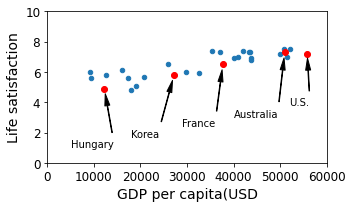

In [188]:
sample_data.plot(kind="scatter",x="GDP per capita",y="Life satisfaction",figsize=(5,3))
plt.axis([0,60000,0,10])
position_text ={
    "Hungary":(5000,1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country,post_text in position_text.items():
    post_data_x,post_data_y=sample_data.loc[country]
    country ="U.S." if country == "United States" else country#mengganti united states dengan u.s.
    plt.annotate(country,xy=(post_data_x,post_data_y),xytext=post_text,
                 arrowprops=dict(facecolor="black",width=0.5,shrink=0.1,headwidth=5))
    plt.plot(post_data_x,post_data_y,"ro")
plt.xlabel("GDP per capita(USD")
save_fig("money_happy_scatterplot")
plt.show()

In [189]:
# output:
sample_data.to_csv(os.path.join("datasets","lifesat","lifesat.csv"))


Saving figure tweaking_params_plot


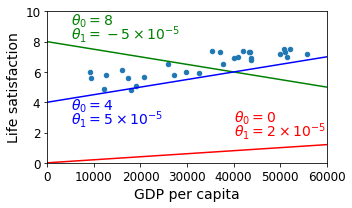

In [190]:
sample_data.plot(kind="scatter",x="GDP per capita",y="Life satisfaction",figsize=(5,3))
plt.xlabel("GDP per capita")
plt.axis([0,60000,0,10])
X=np.linspace(0,60000,1000)#dari 0-60000 dengan jumlah data 1000

#plot gradient
plt.plot(X,2*X/100000,"r")
plt.plot(X,8 - 5*X/100000,"g")
plt.plot(X,4 + 5*X/100000,"b")

#label gradient
plt.text(40000,2.7,r"$\theta_0 = 0$",fontsize=14,color="r")
plt.text(40000,1.8,r"$\theta_1 = 2\times 10 ^{-5}$",fontsize=14,color="r")

plt.text(5000,9.1,r"$\theta_0 = 8$",fontsize=14,color="g")
plt.text(5000,8.2,r"$\theta_1 = -5 \times 10 ^{-5}$",fontsize=14,color="g")

plt.text(5000,3.5,r"$\theta_0 = 4$",fontsize=14,color="b")
plt.text(5000,2.6,r"$\theta_1 = 5 \times 10 ^{-5}$",fontsize=14,color="b")
save_fig("tweaking_params_plot")
plt.show()


In [200]:
from sklearn import linear_model
lin1=linear_model.LinearRegression()
Xsample=np.c_[sample_data["GDP per capita"]]
ysample=np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample,ysample)
to,t1=lin1.intercept_[0],lin1.coef_[0][0]#[0]=>menyamakan dimensi
to,t1 # mendapatkan nilai dari intercept dan coef nya
# f(x)= b0 + b1.x ->regresion

(4.853052800266436, 4.911544589158484e-05)

Saving figure regresion_plot


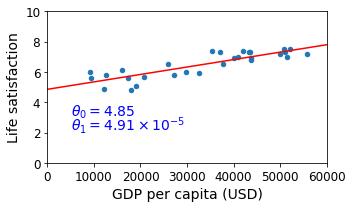

In [192]:
sample_data.plot(kind="scatter",x="GDP per capita",y="Life satisfaction",figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0,60000,0,10])
X=np.linspace(0,60000,1000)
plt.plot(X,to + t1 *X,"r")
plt.text(5000,3.1,r"$\theta_0 = 4.85$",fontsize=14,color="b")
plt.text(5000,2.2,r"$\theta_1 = 4.91 \times 10 ^{-5}$",fontsize=14,color="b")
save_fig("regresion_plot")
plt.show()

In [193]:
cyprus_gdp = gdp.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp)
cyprus_predict_life_satisfaction=lin1.predict([[cyprus_gdp]])
cyprus_predict_life_satisfaction

22587.49


array([[5.96244744]])

Saving figure cyprus_prediction_plot


c:\Users\User\env\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


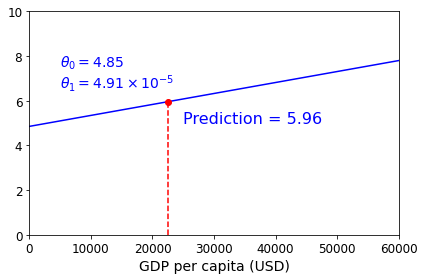

In [194]:
# visualisasi Cyprus life statification
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0,60000,1000)
plt.plot(X, to + t1*X, "b")
plt.axis([0,60000,0,10])
plt.text(5000,7.5,r"$\theta_0 = 4.85$",fontsize=14,color="b")
plt.text(5000,6.6,r"$\theta_1 = 4.91 \times 10 ^{-5}$",fontsize=14,color="b")
plt.plot([cyprus_gdp,cyprus_gdp],[0,cyprus_predict_life_satisfaction],"r--")
plt.text(25000,5.0,r"Prediction = 5.96",fontsize=16,color="b")
plt.plot(cyprus_gdp,cyprus_predict_life_satisfaction,"ro")
save_fig("cyprus_prediction_plot")
plt.show()

In [195]:
# test
# print(country_stats[["GDP per capita", "Life satisfaction"]].loc["Japan"])
print(oecd_bli)
# print([oecd_bli.loc["Country"]=="Cyprus"])

Indicator        Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                     
Australia                 13.0           2.1                         10.5   
Austria                   27.0           3.4                          7.1   
Belgium                   21.0           6.6                          4.5   
Brazil                    18.0           7.9                          4.0   
Canada                    15.0           1.3                         10.5   
Chile                     46.0           6.9                          2.0   
Czech Republic            16.0           2.8                          6.8   
Denmark                   15.0           3.9                          7.0   
Estonia                    9.0           5.5                          3.3   
Finland                   15.0           2.4                          9.0   
France                    12.0           5.0                          3.5   

In [196]:
# prepare data
X=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

print(X)
print(y)

[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]
[[6. ]
 [5.6]
 [4.9]
 [5.8]
 [6.1]
 [5.6]
 [4.8]
 [5.1]
 [5.7]
 [6.5]
 [5.8]
 [6. ]
 [5.9]
 [7.4]
 [7.3]
 [6.5]
 [6.9]
 [7. ]
 [7.4]
 [7.3]
 [7.3]
 [6.9]
 [6.8]
 [7.2]
 [7.5]
 [7.3]
 [7. ]
 [7.5]
 [7.2]]


In [197]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [198]:
position_text2={
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}


Saving figure representative_training_data_scatterplot


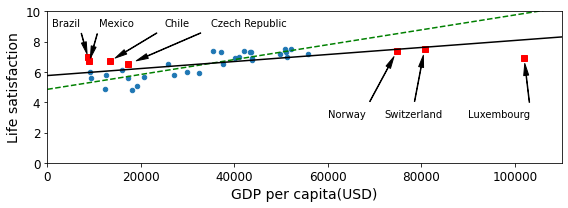

In [211]:
# cleaning ->sampling data plot
sample_data.plot(kind="scatter",x="GDP per capita",y="Life satisfaction",figsize=(8,3))
plt.axis([0,110000,0,10])
for country,post_text in position_text2.items():
    post_data_x,post_data_y= missing_data.loc[country]
    plt.annotate(country,xy=(post_data_x,post_data_y),xytext=post_text,
                 arrowprops=dict(facecolor="black",width=0.5,shrink=-0.1,headwidth=5))
    plt.plot(post_data_x,post_data_y,"rs")
X=np.linspace(0,110000,1000)
plt.plot(X, to + t1*X,"--g")

#outlier plot (sampling noice & sampling bias)
lin_reg_full=linear_model.LinearRegression()
Xfull=np.c_[full_country_stats["GDP per capita"]]
yfull=np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull,yfull)
t0full,t1full=lin_reg_full.intercept_[0],lin_reg_full.coef_[0][0]
plt.plot(X,t0full + t1full * X,"k")
plt.xlabel("GDP per capita(USD)")
save_fig("representative_training_data_scatterplot")
plt.show()

brazil,mexico,chile, chez => sampling noice
->because the value so low than median value or mean value
norway ,swiz,luxebourg => sampling bias
->because the value so high than median value or mean value

Saving figure overfitting_model_plot


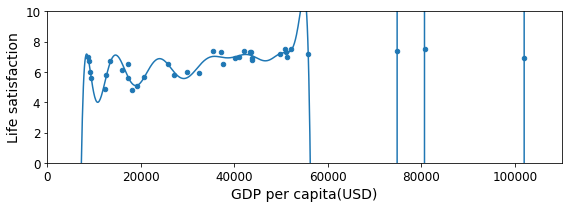

In [213]:
# make data overfit
full_country_stats.plot(kind="scatter",x="GDP per capita",y="Life satisfaction",figsize=(8,3))
plt.axis([0,110000,0,10])

from sklearn import preprocessing
from sklearn import pipeline
poly=preprocessing.PolynomialFeatures(degree=30,include_bias=False)
scaler=preprocessing.StandardScaler()
lin_reg2=linear_model.LinearRegression()

pipline_reg=pipeline.Pipeline([
    ("poly",poly),
    ("scal",scaler),
    ("lin",lin_reg2)
])
pipline_reg.fit(Xfull,yfull)
curve=pipline_reg.predict(X[:,np.newaxis])
plt.plot(X,curve)
plt.xlabel("GDP per capita(USD)")
save_fig("overfitting_model_plot")
plt.show()


In [215]:
# cek data
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]


Country
New Zealand    7.3
Sweden         7.2
Norway         7.4
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [216]:
gdp.loc[[c for c in gdp.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Saving figure ridge_model_plot


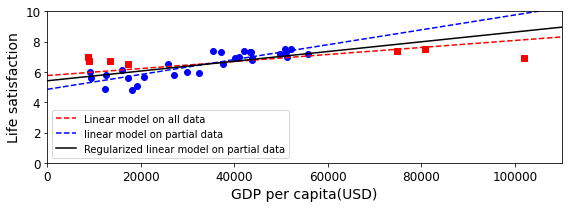

In [230]:
X=np.linspace(0,110000,1000)
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita(USD)")
plt.ylabel("Life satisfaction")

#plot sample data and missing data
plt.plot(list(sample_data["GDP per capita"]),list(sample_data["Life satisfaction"]),"bo")
plt.plot(list(missing_data["GDP per capita"]),list(missing_data["Life satisfaction"]),"rs")

#plot regresion sample data and missing data
plt.plot(X,t0full + t1full *X,"r--",label="Linear model on all data")
plt.plot(X,to + t1 *X,"b--",label="linear model on partial data")

#create model om generalization of regularized model methode
ridge=linear_model.Ridge(alpha=10**9.5)
ridge.fit(Xsample,ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X,t0ridge + t1ridge * X,"k",label="Regularized linear model on partial data")
plt.legend()
plt.axis([0,110000,0,10])
save_fig("ridge_model_plot")
plt.show()

In [225]:
nilai=10**9.5
nilai

3162277660.1683793